In [358]:
!pip install lifelines

In [359]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [360]:
df = pd.DataFrame(pd.read_csv("/content/S1Dataset.csv"))

In [361]:
df.sample(frac=1)
df.head()

,Age,Gender,EDSS,Pyramidal,Cerebellar,Sensory,DD,ZEllipse_area_open,ZCOP_path_open,ZSway_Rate_open,ZEllipse_area_closed,ZCOP_path_closed,ZSway_Rate_closed,Romberg_Ratio,EDSSsubgroups
0,22,2.0,1.5,3.0,2.0,0.0,2.0,44.97,155.80,7.90,68.07,235.60,11.90,1.51,4.0
1,58,1.0,2.0,2.0,0.0,1.0,0.0,170.03,254.37,12.97,1243.07,1279.93,65.27,5.03,1.0
2,34,2.0,2.0,1.0,2.0,1.0,8.0,29.60,106.70,5.43,35.70,124.57,6.37,1.17,2.0
3,66,2.0,2.0,2.0,0.0,0.0,3.3,8.83,55.13,2.80,8.27,77.90,3.97,1.42,1.0
4,52,2.0,2.0,2.0,0.0,0.0,0.0,24.80,82.50,4.20,21.10,124.20,6.30,1.50,1.0


In [362]:
df['Gender'].value_counts()

2.0    211
1.0    131
Name: Gender, dtype: int64

In [363]:
df.isna().sum()

Age                      0
Gender                   0
EDSS                     0
Pyramidal                0
Cerebellar               0
Sensory                  0
DD                      12
ZEllipse_area_open       0
ZCOP_path_open           0
ZSway_Rate_open          2
ZEllipse_area_closed     0
ZCOP_path_closed         0
ZSway_Rate_closed        0
Romberg_Ratio            2
EDSSsubgroups            0
dtype: int64

In [364]:
df = df.dropna()
df.isna().sum()

Age                     0
Gender                  0
EDSS                    0
Pyramidal               0
Cerebellar              0
Sensory                 0
DD                      0
ZEllipse_area_open      0
ZCOP_path_open          0
ZSway_Rate_open         0
ZEllipse_area_closed    0
ZCOP_path_closed        0
ZSway_Rate_closed       0
Romberg_Ratio           0
EDSSsubgroups           0
dtype: int64

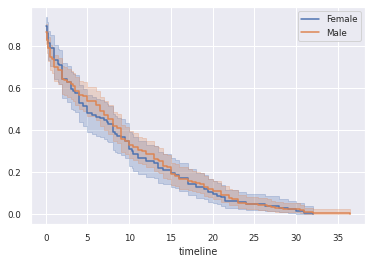

In [365]:
from lifelines import KaplanMeierFitter

kmf_male = KaplanMeierFitter() 
kmf_female = KaplanMeierFitter() 
female = df.query("Gender == 1")
male = df.query("Gender == 2")

kmf_female.fit(female['DD'], event_observed = female['EDSS'], label = 'Female')
kmf_male.fit(male['DD'], event_observed = male['EDSS'], label = 'Male' ) 


kmf_female.plot()
kmf_male.plot()

In [366]:
df = df.drop(['Age','DD'],axis =1 )

In [367]:
df.columns

Index(['Gender', 'EDSS', 'Pyramidal', 'Cerebellar', 'Sensory',
       'ZEllipse_area_open', 'ZCOP_path_open', 'ZSway_Rate_open',
       'ZEllipse_area_closed', 'ZCOP_path_closed', 'ZSway_Rate_closed',
       'Romberg_Ratio', 'EDSSsubgroups'],
      dtype='object')

In [368]:
coluns_to_remove_outliers = ['Pyramidal','ZEllipse_area_open','ZCOP_path_open','ZSway_Rate_open','ZEllipse_area_closed', 'ZCOP_path_closed', 'ZSway_Rate_closed',
       'Romberg_Ratio',]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

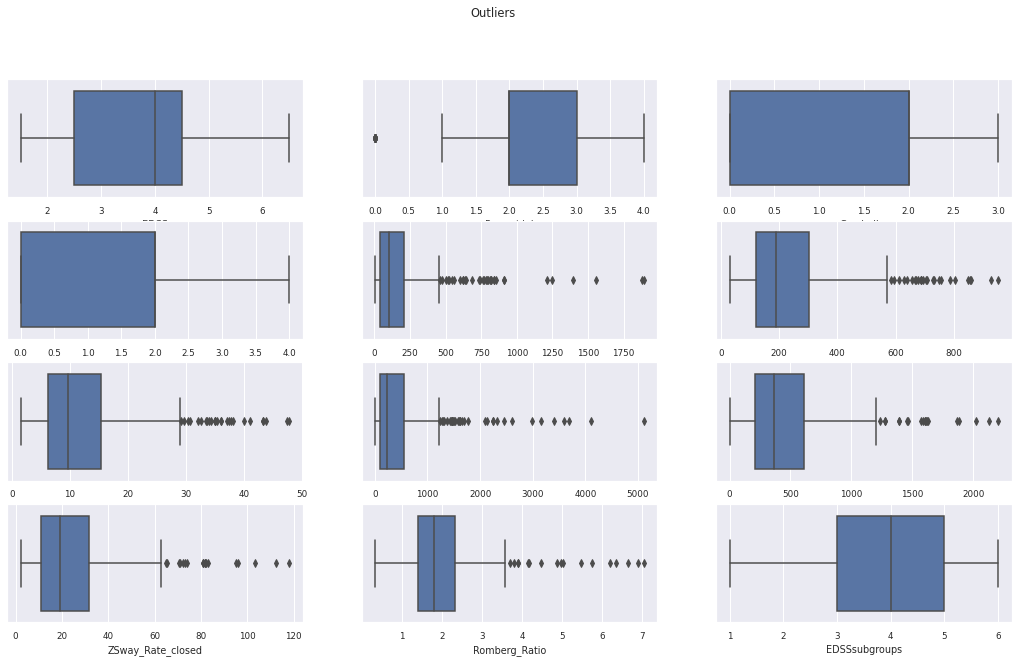

In [369]:
fig, axes = plt.subplots(4, 3, figsize=(18, 10))

fig.suptitle('Outliers')
  
  

sns.boxplot( df['EDSS'],ax=axes[0, 0])
sns.boxplot( df['Pyramidal'],ax=axes[0, 1])
sns.boxplot( df['Cerebellar'],ax=axes[0, 2])
sns.boxplot( df['Sensory'],ax=axes[1, 0])
sns.boxplot( df['ZEllipse_area_open'],ax=axes[1, 1])
sns.boxplot( df['ZCOP_path_open'],ax=axes[1, 2])
sns.boxplot( df['ZSway_Rate_open'],ax=axes[2, 0])
sns.boxplot( df['ZEllipse_area_closed'],ax=axes[2, 1])
sns.boxplot( df['ZCOP_path_closed'],ax=axes[2, 2])
sns.boxplot( df['ZSway_Rate_closed'],ax=axes[3, 0])
sns.boxplot( df['Romberg_Ratio'],ax=axes[3, 1])
sns.boxplot( df['EDSSsubgroups'],ax=axes[3, 2])

In [370]:
new_df = df.copy()

In [371]:
index = new_df[(new_df['ZEllipse_area_open'] >= 250)].index
new_df.drop(index, inplace=True)

In [372]:
index = new_df[(new_df['ZCOP_path_open'] >= 110)].index
new_df.drop(index, inplace=True)

In [373]:
index = new_df[(new_df['Romberg_Ratio'] >= 3.2)].index
new_df.drop(index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

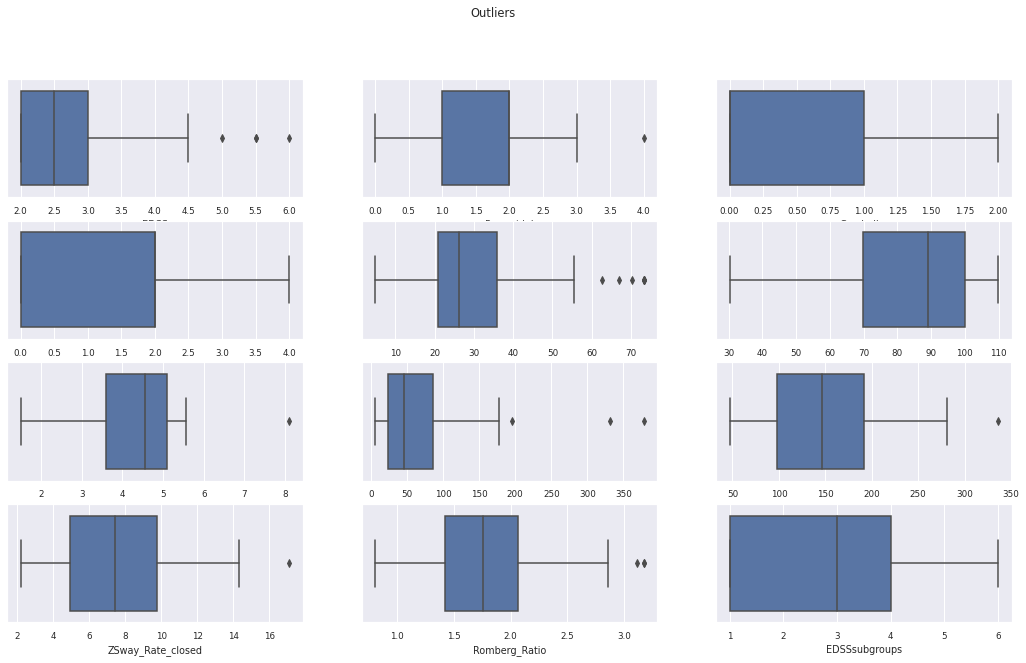

In [374]:
fig, axes = plt.subplots(4, 3, figsize=(18, 10))

fig.suptitle('Outliers')
  
  

sns.boxplot( new_df['EDSS'],ax=axes[0, 0])
sns.boxplot( new_df['Pyramidal'],ax=axes[0, 1])
sns.boxplot( new_df['Cerebellar'],ax=axes[0, 2])
sns.boxplot( new_df['Sensory'],ax=axes[1, 0])
sns.boxplot( new_df['ZEllipse_area_open'],ax=axes[1, 1])
sns.boxplot( new_df['ZCOP_path_open'],ax=axes[1, 2])
sns.boxplot( new_df['ZSway_Rate_open'],ax=axes[2, 0])
sns.boxplot( new_df['ZEllipse_area_closed'],ax=axes[2, 1])
sns.boxplot( new_df['ZCOP_path_closed'],ax=axes[2, 2])
sns.boxplot( new_df['ZSway_Rate_closed'],ax=axes[3, 0])
sns.boxplot( new_df['Romberg_Ratio'],ax=axes[3, 1])
sns.boxplot( new_df['EDSSsubgroups'],ax=axes[3, 2])

In [375]:
target = pd.get_dummies(df['EDSS'])

In [376]:
data = new_df[[              'Gender',            'Pyramidal',           'Cerebellar',
                    'Sensory',   'ZEllipse_area_open',       'ZCOP_path_open',
            'ZSway_Rate_open', 'ZEllipse_area_closed',     'ZCOP_path_closed',
          'ZSway_Rate_closed',        'Romberg_Ratio',        'EDSSsubgroups','EDSS']]
data

,Gender,Pyramidal,Cerebellar,Sensory,ZEllipse_area_open,ZCOP_path_open,ZSway_Rate_open,ZEllipse_area_closed,ZCOP_path_closed,ZSway_Rate_closed,Romberg_Ratio,EDSSsubgroups,EDSS
2,2.0,1.0,2.0,1.0,29.60,106.70,5.43,35.70,124.57,6.37,1.17,2.0,2.0
3,2.0,2.0,0.0,0.0,8.83,55.13,2.80,8.27,77.90,3.97,1.42,1.0,2.0
4,2.0,2.0,0.0,0.0,24.80,82.50,4.20,21.10,124.20,6.30,1.50,1.0,2.0
5,1.0,2.0,0.0,0.0,24.80,82.50,4.20,21.10,124.20,6.30,1.50,1.0,2.0
6,2.0,2.0,0.0,0.0,36.30,90.50,4.60,54.50,136.30,6.90,1.50,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.0,2.0,2.0,2.0,18.87,109.90,5.57,35.57,189.07,9.50,1.71,6.0,4.5
273,1.0,3.0,2.0,2.0,30.50,71.40,3.60,195.40,225.40,11.40,3.17,6.0,5.0
285,2.0,4.0,2.0,1.0,16.00,60.60,3.10,30.80,96.00,4.90,1.58,4.0,5.5
286,1.0,2.0,2.0,2.0,67.00,107.90,5.40,378.00,336.10,17.10,3.17,6.0,5.5


In [377]:
data.columns

Index(['Gender', 'Pyramidal', 'Cerebellar', 'Sensory', 'ZEllipse_area_open',
       'ZCOP_path_open', 'ZSway_Rate_open', 'ZEllipse_area_closed',
       'ZCOP_path_closed', 'ZSway_Rate_closed', 'Romberg_Ratio',
       'EDSSsubgroups', 'EDSS'],
      dtype='object')

In [378]:
x=data.iloc[:,4:10]
y = data.iloc[:,-1:]

In [379]:
data.iloc[:,4:10]

,ZEllipse_area_open,ZCOP_path_open,ZSway_Rate_open,ZEllipse_area_closed,ZCOP_path_closed,ZSway_Rate_closed
2,29.60,106.70,5.43,35.70,124.57,6.37
3,8.83,55.13,2.80,8.27,77.90,3.97
4,24.80,82.50,4.20,21.10,124.20,6.30
5,24.80,82.50,4.20,21.10,124.20,6.30
6,36.30,90.50,4.60,54.50,136.30,6.90
...,...,...,...,...,...,...
257,18.87,109.90,5.57,35.57,189.07,9.50
273,30.50,71.40,3.60,195.40,225.40,11.40
285,16.00,60.60,3.10,30.80,96.00,4.90
286,67.00,107.90,5.40,378.00,336.10,17.10


In [380]:
y.value_counts()

EDSS
2.0     25
2.5     17
4.0      7
3.0      6
5.5      2
4.5      2
6.0      1
5.0      1
3.5      1
dtype: int64

In [381]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_smt,y_smt = oversample.fit_resample(x,y)
pd.DataFrame(y_smt).value_counts()

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got continuous instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


6.0    25
5.5    25
5.0    25
4.5    25
4.0    25
3.5    25
3.0    25
2.5    25
2.0    25
dtype: int64

In [382]:
target

,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
337,0,0,0,0,0,0,0,0,0,0,1
338,0,0,0,0,0,0,0,0,0,0,1
339,0,0,0,0,0,0,0,0,0,0,1
340,0,0,0,0,0,0,0,0,0,0,1


In [383]:
X_train, X_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size=0.33, random_state=42)

In [384]:
from sklearn.ensemble import RandomForestClassifier
model = XGBClassifier()
model.fit(X_train,np.array(y_train))
y_pred = model.predict(X_test)

In [385]:
y_pred,np.array(y_test)

(array([2. , 5.5, 4. , 6. , 4.5, 6. , 5.5, 3. , 5.5, 5. , 2.5, 2. , 5.5,
        2.5, 2.5, 3. , 5.5, 5. , 3.5, 5. , 3. , 2.5, 5. , 4.5, 3.5, 3. ,
        5.5, 5. , 6. , 3.5, 4. , 3. , 2.5, 5.5, 6. , 4. , 5.5, 4. , 3.5,
        4.5, 4.5, 6. , 4.5, 6. , 4.5, 5. , 2.5, 4. , 4. , 4. , 6. , 3. ,
        3.5, 3.5, 4. , 6. , 2. , 4. , 5.5, 5.5, 2.5, 2.5, 2.5, 2. , 3.5,
        2.5, 3. , 2. , 4.5, 3.5, 4.5, 4.5, 2.5, 4.5, 5.5]),
 array([2. , 5.5, 4. , 6. , 4.5, 6. , 5.5, 3. , 5.5, 5. , 2.5, 2. , 5.5,
        2.5, 2.5, 3. , 5.5, 5. , 3.5, 5. , 3. , 2. , 5. , 4.5, 3.5, 3. ,
        5.5, 5. , 6. , 3.5, 4. , 3. , 2. , 5.5, 6. , 4. , 5.5, 4. , 3.5,
        4.5, 4.5, 6. , 4.5, 6. , 4.5, 5. , 2.5, 4. , 4. , 4. , 6. , 3. ,
        3.5, 3.5, 4. , 2.5, 2. , 4. , 5.5, 5.5, 2. , 2.5, 2.5, 2. , 3.5,
        2.5, 3. , 2. , 4.5, 3.5, 4.5, 4.5, 2.5, 4.5, 5.5]))

In [386]:
def nearest_5(arr):
  temp_list = []
  for number in arr:
    temp_list.append(round(number * 2.0) / 2.0)
  return temp_list

In [387]:
def float_to_int(list_to_transform):
  temp_list=[]
  for x in list_to_transform:
    if x == 1.5:
      temp_list.append(1)
    if x == 2.:
      temp_list.append(2)
    if x == 2.5:
      temp_list.append(3)
    if x == 3.:
      temp_list.append(4)
    if x == 3.5:
      temp_list.append(5)
    if x == 4.:
      temp_list.append(6)
    if x == 4.5:
      temp_list.append(7)
    if x == 5.:
      temp_list.append(8)
    if x == 5.5:
      temp_list.append(9)
    if x == 6.:
      temp_list.append(10)
    if x == 6.5:
      temp_list.append(11)
  return temp_list

In [388]:
def show_acc(y_test,y_pred):
  accuracy = accuracy_score(y_test,y_pred)
  print('accuracy: ',accuracy)

In [395]:
scalar = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5,6.0]

In [396]:
def show_cm(y_test,y_pred):
  cm = confusion_matrix(y_pred,y_test)
  df_cm = pd.DataFrame(cm,scalar,scalar)
  plt.figure(figsize=(10,7))
  sns.set(font_scale=0.8) # for label size
  sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 8}) # font size
  plt.show()

accuracy:  0.9466666666666667


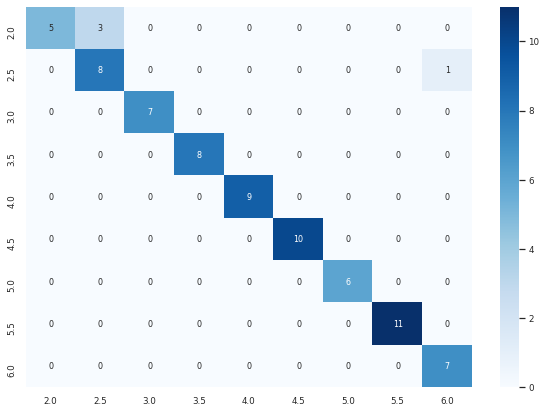

In [397]:
show_acc(float_to_int(y_pred),np.array(float_to_int(np.array(y_test))))
show_cm(float_to_int(y_pred),np.array(float_to_int(np.array(y_test))))